In [2]:
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt
import matplotlib
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score

matplotlib.rc('font', family='DejaVu Sans')
matplotlib.rc('text', usetex=True)
matplotlib.rcParams['lines.linewidth'] = 2
matplotlib.rcParams['text.latex.preamble'] = r'\boldmath'
pd.set_option("display.precision", 2)

In [9]:
def scores(df):
    y_pred = df['Pred']
    y_true = df['GT']
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, df['P_value'])
    cm = confusion_matrix(y_true, y_pred)
    typeI = cm[1, 0] / cm[1].sum()
    typeII = cm[0, 1] / cm[0].sum()
    res = {
        # 'Precision': precision * 100,
        # 'Recall': recall * 100,
        'F1': f1 * 100,
        'AUC': auc * 100,
        'Type I error': typeI * 100,
        'Type II error': typeII * 100,
        # 'Time': df['Time'].mean()
    }
    return pd.Series(res)

In [10]:
alpha = 0.05
df = pd.read_csv('results/result_SCIT-LCIT-KCIT-CCIT-FisherZ.csv', index_col=0)
df = df[df.Method.isin(['SCIT', 'LCIT', 'KCIT', 'CCIT'])]
df['Pred'] = df['P_value'] >= alpha
id_vars = ['Linearity', 'd', 'Method']
df = df.groupby(id_vars).apply(scores)
df

F1     AUC  Type I error  Type II error
Linearity  d   Method                                            
Non-linear 1   CCIT    99.80  100.00           0.4            0.0
               KCIT    98.17  100.00           3.6            0.0
               LCIT    92.69   95.13           3.6           11.6
               SCIT    80.07   62.61           7.6           38.4
           25  CCIT    70.72   79.51           0.0           82.8
               KCIT    80.65   97.19          30.0            3.6
               LCIT    91.67   94.77           7.6            9.2
               SCIT    73.51   61.12          18.4           40.4
           50  CCIT    69.75   63.00           0.4           86.0
               KCIT    56.30   90.48          58.0            7.2
               LCIT    90.62   96.09           9.2            9.6
               SCIT    72.89   61.74          18.8           41.6
           75  CCIT    69.54   64.54           0.0           87.6
               KCIT    43.43   84.22          69.6            9.6
               LCIT    89.34   95.71          12.8            8.0
               SCIT    71.20   58.59          20.4           44.0
           100 CCIT    69.83   57.44           0.0           86.4
               KCIT    46.99   80.52          65.6           12.0
               LCIT    85.71   92.64          14.8           13.6
               SCIT    72.66   57.44          17.6           44.4

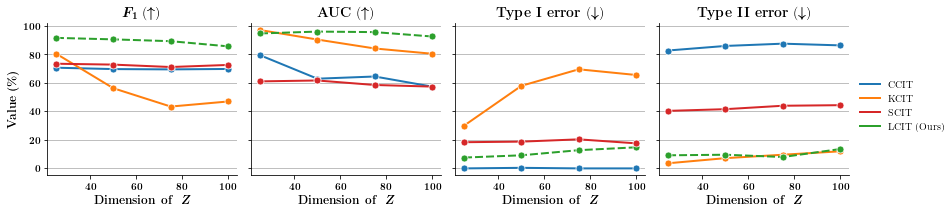

In [12]:
score_names = df.columns
d = pd.melt(df.reset_index(), id_vars=id_vars, value_vars=score_names, value_name='Value', var_name='Metric')
d = d[d['d'] >= 25]
d['Metric'] = d['Metric'].map({'F1': r'$F_1$ ($\uparrow$)', 'AUC': r'\textbf{AUC} ($\uparrow$)', 'Type I error': r'\textbf{Type I error} ($\downarrow$)', 'Type II error': r'\textbf{Type II error} ($\downarrow$)'})

style = d['Method'] == 'LCIT'
d['Method'] = d['Method'].map(lambda x: x + ' (Ours)' if x == 'LCIT' else x)
g = sns.FacetGrid(d, col='Metric', sharey=True)
g.map_dataframe(sns.lineplot, x='d', y='Value', hue='Method', style=style, marker='o', markersize=7)
g.set_xlabels(r'\textbf{Dimension of } $Z$', fontsize=12)
g.set_ylabels(r'\textbf{Value (\%)}', fontsize=12)
g.set_titles('{col_name}', size=14)
for ax in g.axes.flat:
    ax.grid(axis='y')

handles, labels = plt.gca().get_legend_handles_labels()
order = [0, 1, 3, 2]

# pass handle & labels lists along with order as below
g.add_legend(label_order=['CCIT', 'KCIT', 'SCIT', 'LCIT (Ours)'])
# plt.legend([handles[i] for i in order], [labels[i] for i in order])
g.savefig('results/exp2.pdf')